In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_sample(x, axis):
    # img = x.reshape(96,96)
    axis.imshow(x)
    axis.axis('off')

def draw_multi_plot(X, y, row_num=4, col_num=4, fig_size=(15,10)):
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)
    i=0
    for row in axes:
        for each_ax in row:
            plot_sample(X[i], y[i], each_ax)
            i += 1
    plt.tight_layout()

In [3]:
data = pd.read_csv('trainLabels.csv')

In [4]:
from PIL import Image

In [5]:
img = Image.open("train/1.Bmp")

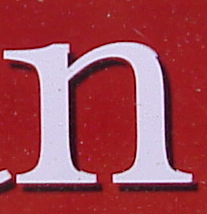

In [6]:
img

## 여기서 size 는 튜플을 반환해주는데, mode는 RGB 이기 때문에 dim = 3 이다. 
### 실제 픽셀수는 저 튜플 값을 곱하고, 3까지 곱해주어야 한다

In [7]:
print(img.size)
print(img.format)
print(img.mode)
print(type(img))

(207, 214)
PNG
RGB
<class 'PIL.PngImagePlugin.PngImageFile'>


In [8]:
import glob
from skimage.transform import resize
from skimage.io import imread, imsave

In [9]:
trainFiles = glob.glob("train/1.Bmp" )
for i, nameFile in enumerate(trainFiles):
    print(nameFile)
    image = imread(nameFile)
    print(image.size)
    print(image.ndim)
    print(image.shape)
    imageResized = resize(image, (20,20))
    print('imageResized.size', imageResized.size)
    print('imageResized.ndim', imageResized.ndim)
    print('imageResized.shape', imageResized.shape)
    break
#     newName = "/".join( nameFile.split("\\")[:-1] ) + "Resized/" + nameFile.split("\\")[-1]	
#     imsave ( newName, imageResized )
# image

train/1.Bmp
132894
3
(214, 207, 3)
imageResized.size 1200
imageResized.ndim 3
imageResized.shape (20, 20, 3)


## skimage.transform resize 함수이 특징
* resize(image, (20,20)) 라고 하더라도
* (214, 207, 3) shape 를 가진 원본 이미지는 (20, 20, 3)으로 변하게 된다. 즉 채널값은 유지가 되면서 변형이 일어난다.

In [10]:
132894/(207*214)

3.0

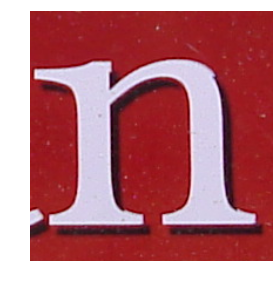

In [15]:
fig, ax = plt.subplots()
plot_sample(image, ax)
plt.tight_layout()

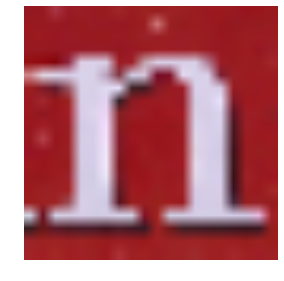

In [14]:
fig, ax = plt.subplots()
plot_sample(imageResized, ax)
plt.tight_layout()

## 해상도가 낮아지는 효과가 있다.

### matplotlib 에서 이미지를 그릴때, 상대적 값으로 값을 채운다는 것을 확인하였다.

[[-40 -30 -20 -10]
 [  0  10  20  30]
 [ 40  50  60  70]
 [ 80  90 100 110]]


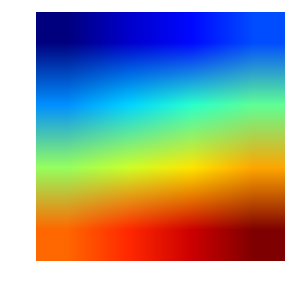

In [10]:
fig, ax = plt.subplots()
sc = 4
image = [[10*y for y in range((x-1)*sc,x*sc)] for x in range(sc)]
image = np.array(image)
image.reshape
print(image)
plot_sample(image, ax)
plt.tight_layout()